# Laptop data analysis

### Imports


In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from six import StringIO  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
import pydot 
# from my_train_test_split import MyTrainTestSplit
from Linear_regression_mycode import MyLinearRegression
import os

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

## Get and prepearing the Data


### Load the data

In [126]:
df1 = pd.read_csv('trading_prepeard.csv')
df1.head()


,Symbol,Price,Change %,Change,Bid,Ask,High,Low,Tech Rating
0,AEDAUD,0.41152,-0.65,-0.00269,0.41152,0.41232,0.41422,0.41038,1
1,AEDBRX,1.37920,-1.02,-0.01420,1.37920,1.37970,1.37920,1.37920,1
2,AEDCAD,0.37221,0.10,0.00036,0.37221,0.37301,0.37228,0.37130,-1
3,AEDCHF,0.24603,-0.57,-0.00140,0.24603,0.24683,0.24746,0.24603,1
4,AEDGBP,0.21659,-0.08,-0.00018,0.21659,0.21739,0.21686,0.21608,1


In [127]:
df1['Tech Rating']

0       1
1       1
2      -1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21     -1
22     -1
23      1
24     -1
25      1
26      1
27      1
28     -1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42     -1
43     -1
44     -1
45     -1
46      1
47     -1
48     -1
49     -1
50     -1
51     -1
52     -1
53     -1
54     -1
55     -1
56     -1
57     -1
58     -1
59     -1
60     -1
61     -1
62     -1
63     -1
64     -1
65     -1
66     -1
67     -1
68     -1
69     -1
70     -1
71     -1
72     -1
73     -1
74     -1
75     -1
76     -1
77     -1
78     -1
79     -1
80      1
81     -1
82     -1
83     -1
84     -1
85     -1
86     -1
87     -1
88     -1
89     -1
90     -1
91     -1
92      1
93      1
94      1
95      1
96      1
97     -1
98      1
99      1


In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       1131 non-null   object 
 1   Price        1131 non-null   float64
 2   Change %     1131 non-null   float64
 3   Change       1131 non-null   float64
 4   Bid          1131 non-null   float64
 5   Ask          1131 non-null   float64
 6   High         1131 non-null   float64
 7   Low          1131 non-null   float64
 8   Tech Rating  1131 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 79.6+ KB


In [129]:
df1.describe()

,Price,Change %,Change,Bid,Ask,High,Low,Tech Rating
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,957.994128,0.011309,2.340207,957.449526,964.817785,961.801858,955.282737,0.009726
std,6470.852865,0.613516,26.060600,6470.888476,6496.513499,6493.701091,6455.908624,1.000395
min,0.000024,-4.000000,-105.160000,0.000024,0.000024,0.000024,0.000024,-1.000000
25%,0.298120,-0.300000,-0.004650,0.305785,0.286630,0.298680,0.298100,-1.000000
50%,3.701700,0.000000,0.000000,3.698500,3.508600,3.813400,3.701700,1.000000
75%,46.432500,0.360000,0.015850,45.857400,44.991038,49.492000,46.432500,1.000000
max,112356.490000,3.230000,571.000000,112356.490000,112356.690000,112910.810000,112355.350000,1.000000


### Show some plot

<Axes: >

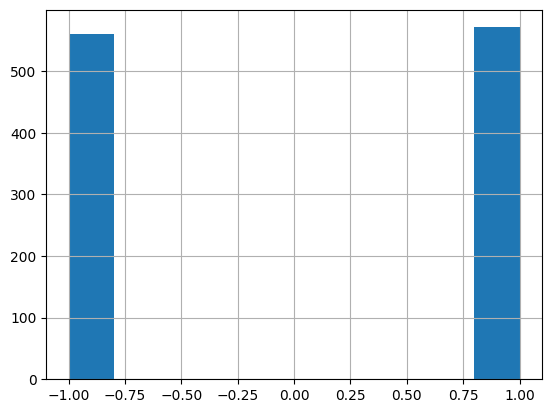

In [130]:
df1['Tech Rating'].hist()

<Axes: >

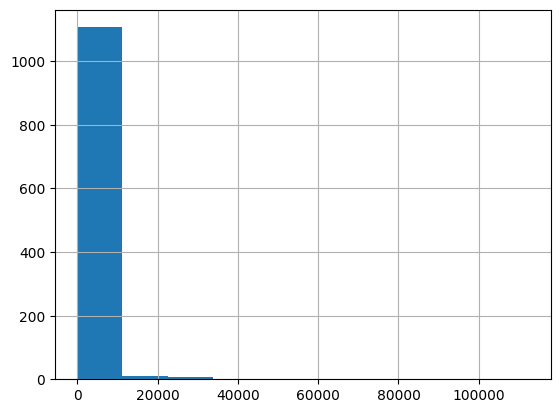

In [131]:
df1['Price'].hist()


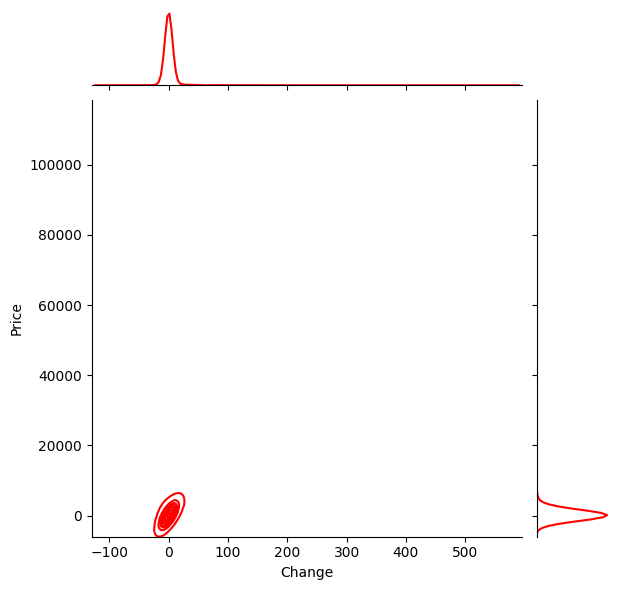

In [132]:
sns.jointplot(color = 'red' ,x='Change', y='Price', data=df1, kind='kde')

In [133]:
# sns.pairplot(df1,hue = 'Sell_or_Buy')

In [134]:
df1
X = df1.drop(['Tech Rating','Symbol'],axis = 1)
y = df1['Tech Rating']


## Linear Regression

### Training and testing data

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

print('X_tets,info:')
X_test.info()
print('-------------------------------------')
print('y_train.info:')
y_train.info()

X_tets,info:
<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 30 to 1078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     340 non-null    float64
 1   Change %  340 non-null    float64
 2   Change    340 non-null    float64
 3   Bid       340 non-null    float64
 4   Ask       340 non-null    float64
 5   High      340 non-null    float64
 6   Low       340 non-null    float64
dtypes: float64(7)
memory usage: 21.2 KB
-------------------------------------
y_train.info:
<class 'pandas.core.series.Series'>
Index: 791 entries, 299 to 863
Series name: Tech Rating
Non-Null Count  Dtype
--------------  -----
791 non-null    int64
dtypes: int64(1)
memory usage: 12.4 KB


### Linear Regression - SKlearn


In [136]:
y_test

639    -1
323    -1
310    -1
279     1
133    -1
309     1
154     1
321     1
841     1
318    -1
773     1
270    -1
774     1
771    -1
155    -1
785    -1
459    -1
51     -1
271     1
735    -1
698    -1
223    -1
912    -1
446    -1
690     1
458    -1
440     1
971    -1
68     -1
906     1
50     -1
695    -1
703    -1
694    -1
734    -1
461    -1
562    -1
450    -1
418    -1
851    -1
494     1
702     1
972    -1
225     1
6       1
266    -1
840     1
221     1
699    -1
559     1
663    -1
409    -1
855    -1
846    -1
819    -1
845    -1
900     1
276     1
854     1
1109   -1
232     1
664    -1
490     1
811    -1
1026   -1
551     1
552     1
187    -1
375    -1
83     -1
1067   -1
115     1
94      1
779    -1
72     -1
242     1
631    -1
729    -1
675    -1
630     1
376    -1
423    -1
405    -1
373     1
251     1
293     1
188     1
669    -1
415    -1
151     1
780    -1
827    -1
778     1
635    -1
215     1
378    -1
16      1
112    -1
598    -1
292     1


In [137]:
s_lr_prediction[1] > 0

True

In [138]:
s_lr = LinearRegression()
s_lr.fit(X_train,y_train)
s_lr_prediction = s_lr.predict(X_test)
for i in range(len(s_lr_prediction)):
    if s_lr_prediction[i] > 0:
        s_lr_prediction[i] = 1
    else:
        s_lr_prediction[i] = -1
# print(s_lr_prediction)
# print(y_test)
print('---------------SKLEARN-----------------')
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, s_lr_prediction))
print('Mean Squered Error = ', metrics.mean_squared_error(y_test, s_lr_prediction))
print('Root Mean Squered Error = ', np.sqrt(metrics.mean_squared_error(y_test, s_lr_prediction)))



---------------SKLEARN-----------------
Mean Absolute Error =  1.2882352941176471
Mean Squered Error =  2.5764705882352943
Root Mean Squered Error =  1.6051388065321


### Linear Regression - MyCode

In [139]:
model = MyLinearRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

for i in range(len(prediction)):
    if prediction[i] > 0:
        prediction[i] = 1
    else:
        prediction[i] = -1

print('---------------MYCODE-----------------')
print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squered Error = ', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squered Error = ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

---------------MYCODE-----------------
Mean Absolute Error =  1.2882352941176471
Mean Squered Error =  2.5764705882352943
Root Mean Squered Error =  1.6051388065321


Text(0, 0.5, 'Y_Prediction')

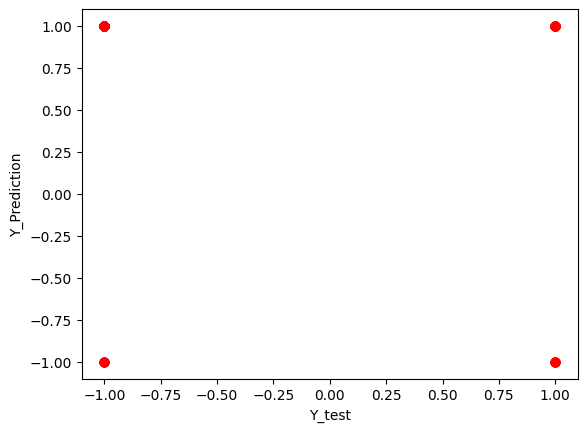

In [140]:
plt.scatter(y_test,prediction,color = 'red')
plt.xlabel('Y_test')
plt.ylabel('Y_Prediction')

# Logistic Regression

### Training and testing data

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)


In [142]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train,y_train)


pr = Logistic_model.predict(X_test)
print(classification_report(y_test,pr))

print(metrics.confusion_matrix(y_test, pr))


              precision    recall  f1-score   support

          -1       0.74      0.67      0.71       153
           1       0.75      0.81      0.78       187

    accuracy                           0.75       340
   macro avg       0.75      0.74      0.74       340
weighted avg       0.75      0.75      0.75       340

[[103  50]
 [ 36 151]]


c:\Users\H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN


### Neighbors

In [143]:
knn = KNeighborsClassifier()
knn.n_neighbors

5

### K value?

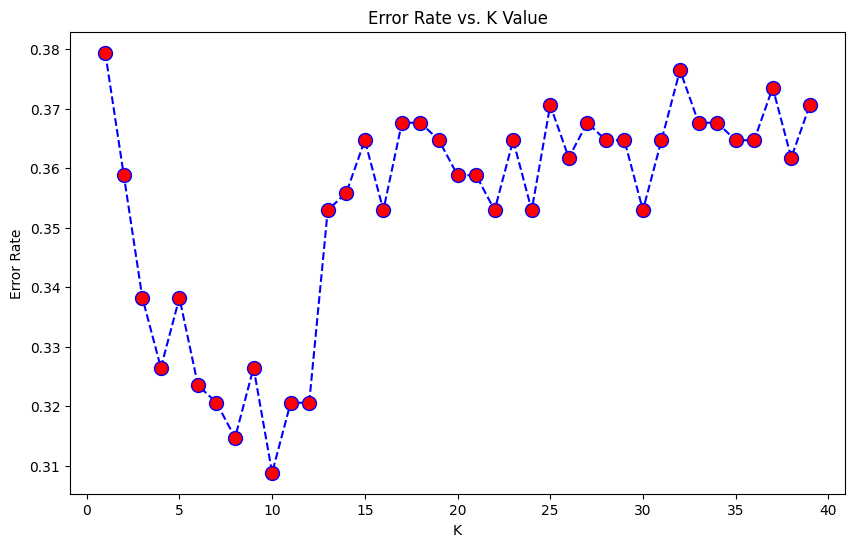

In [144]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

### Train

In [175]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [176]:
pred = knn.predict(X_test)
pred

array([ 1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
        1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,
        1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,
        1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,
        1,  1, -1, -1, -1

### Evaluation

In [177]:
print(confusion_matrix(y_test,pred))


[[111  42]
 [ 63 124]]


In [178]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          -1       0.64      0.73      0.68       153
           1       0.75      0.66      0.70       187

    accuracy                           0.69       340
   macro avg       0.69      0.69      0.69       340
weighted avg       0.70      0.69      0.69       340



## Decision Trees

### Train

In [179]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [180]:
y_train

299     1
104    -1
429     1
866    -1
161     1
506     1
573     1
686    -1
648     1
1087   -1
1032   -1
198    -1
174    -1
850     1
501    -1
228     1
858    -1
1094    1
661    -1
548     1
689    -1
1016    1
205     1
1051    1
130     1
902     1
806    -1
184     1
695    -1
685     1
118     1
793    -1
968    -1
652     1
341    -1
334     1
1050   -1
353     1
361    -1
134    -1
766     1
155    -1
1106   -1
1045    1
374    -1
823     1
77     -1
461    -1
308     1
833     1
468     1
716     1
886    -1
1115   -1
154     1
929    -1
698    -1
94      1
464    -1
454    -1
894    -1
626     1
81     -1
946     1
838     1
995     1
366    -1
1101   -1
560    -1
805     1
688    -1
668     1
528    -1
910     1
584     1
260     1
213     1
543     1
783    -1
202    -1
724     1
113    -1
772     1
801    -1
27      1
1060    1
900     1
620     1
830    -1
776     1
799    -1
824    -1
370     1
475     1
433    -1
786    -1
290     1
570    -1
167     1
612    -1


In [181]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.70      0.69      0.69       153
           1       0.75      0.75      0.75       187

    accuracy                           0.72       340
   macro avg       0.72      0.72      0.72       340
weighted avg       0.72      0.72      0.72       340



### Random Forest



In [182]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=600)

In [183]:
predictions = rfc.predict(X_test)

In [184]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.73      0.68      0.71       153
           1       0.75      0.80      0.77       187

    accuracy                           0.74       340
   macro avg       0.74      0.74      0.74       340
weighted avg       0.74      0.74      0.74       340

[[104  49]
 [ 38 149]]


### Visualization

In [185]:
features = list(df1.columns[1:])
features

['Price', 'Change %', 'Change', 'Bid', 'Ask', 'High', 'Low', 'Tech Rating']

In [186]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Support Vector Classifier

### Train

In [160]:
model = SVC()

In [161]:
model.fit(X_train,y_train)

SVC()

### Predictions and Evaluations

In [162]:
predictions = model.predict(X_test)

In [163]:
print(confusion_matrix(y_test,predictions))

[[ 16 137]
 [  6 181]]


In [164]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.73      0.10      0.18       153
           1       0.57      0.97      0.72       187

    accuracy                           0.58       340
   macro avg       0.65      0.54      0.45       340
weighted avg       0.64      0.58      0.48       340



## Gridsearch

In [165]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf']} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.614 total time=   0.0s


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.595 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.585 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.614 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.595 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.557 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.560 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.595 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [166]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [167]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [168]:
grid_predictions = grid.predict(X_test)

In [169]:
print(confusion_matrix(y_test,grid_predictions))

[[ 95  58]
 [ 50 137]]


In [170]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

          -1       0.66      0.62      0.64       153
           1       0.70      0.73      0.72       187

    accuracy                           0.68       340
   macro avg       0.68      0.68      0.68       340
weighted avg       0.68      0.68      0.68       340



# K Means Clustering

In [172]:
df1

,Symbol,Price,Change %,Change,Bid,Ask,High,Low,Tech Rating
0,AEDAUD,0.411520,-0.65,-2.690000e-03,0.411520,0.412320,0.414220,0.410380,1
1,AEDBRX,1.379200,-1.02,-1.420000e-02,1.379200,1.379700,1.379200,1.379200,1
2,AEDCAD,0.372210,0.10,3.600000e-04,0.372210,0.373010,0.372280,0.371300,-1
3,AEDCHF,0.246030,-0.57,-1.400000e-03,0.246030,0.246830,0.247460,0.246030,1
4,AEDGBP,0.216590,-0.08,-1.800000e-04,0.216590,0.217390,0.216860,0.216080,1
5,AEDHKD,2.122500,-0.04,-9.000000e-04,2.122500,2.130500,2.124400,2.122500,1
6,AEDJPY,41.629000,-0.49,-2.060000e-01,41.629000,41.669000,41.779000,41.447000,1
7,AEDKRW,368.090000,-0.83,-3.090000e+00,368.090000,368.890000,372.740000,367.570000,1
8,AEDKWD,0.083647,-0.08,-7.100000e-05,0.083647,0.083727,0.083973,0.083647,1
9,AEDLKR,80.797000,-0.02,-2.000000e-02,80.797000,80.877000,80.864000,80.774000,1


### Visualization

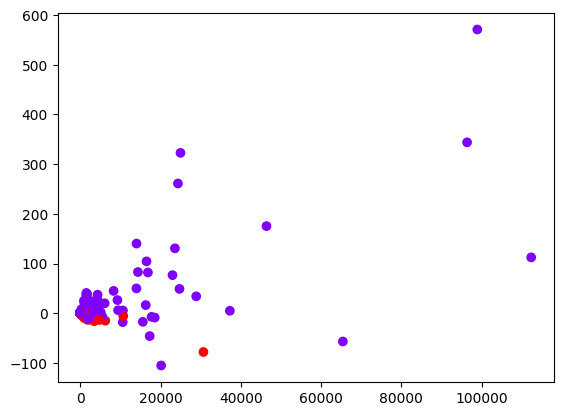

In [173]:
plt.scatter(X['Price'],X['Change'],c=y,cmap='rainbow')

## Creating the Clusters

In [174]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [ ]:
kmeans.cluster_centers_

array([[ 6.63442105e+00,  6.73589349e+00,  6.51065415e+00,
         6.62521679e+00,  5.61628574e+00,  9.56740121e+08,
         6.62641191e+00,  4.12591880e-01,  1.03270696e-02,
        -2.04448031e-03],
       [ 5.80105861e+01,  5.86313906e+01,  5.74223875e+01,
         5.80543151e+01,  5.60520921e+01,  2.17010846e+08,
         5.78129151e+01,  3.87253363e-01,  9.15347962e-03,
         5.42750573e-02]])

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1])

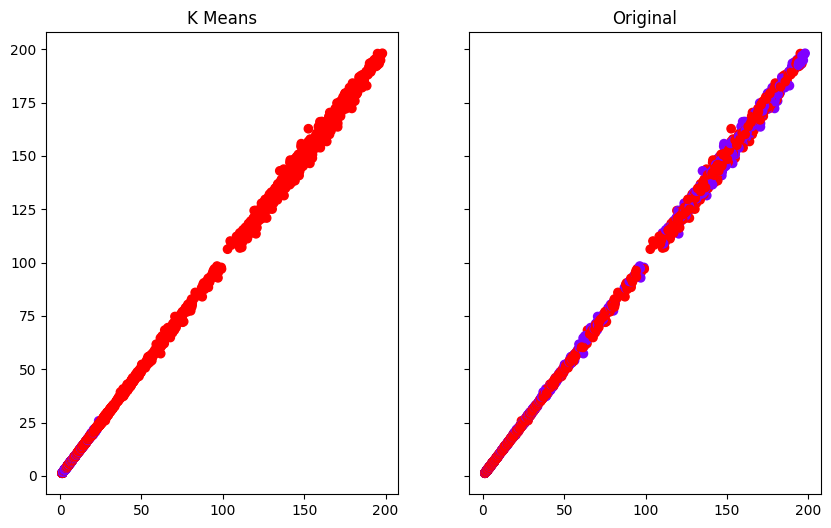

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(X['Open'],X['Close'],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(X['Open'],X['Close'],c=y,cmap='rainbow')

# PCA Visualization

### PCA total code

In [ ]:
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(df1)

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
df1.shape

(4727, 11)

In [ ]:
x_pca.shape


(4727, 2)

Text(0, 0.5, 'Second Principal Component')

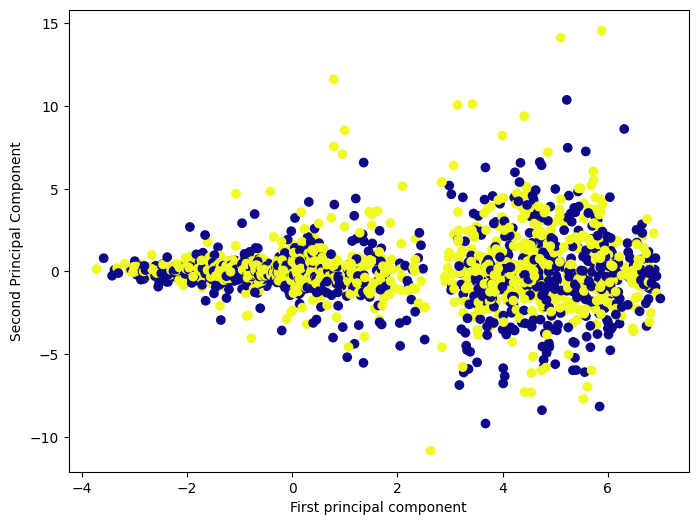

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


### Interpreting the components 


In [ ]:
pca.components_

array([[ 0.39633725,  0.39632022,  0.39637629,  0.39634485,  0.39605639,
        -0.23853841,  0.39611403,  0.02487566, -0.00412239,  0.01828563,
        -0.0024387 ],
       [ 0.00264655,  0.00401059,  0.00289517,  0.00299155,  0.00339608,
         0.00492703,  0.01589404, -0.05218211, -0.70448136, -0.70442402,
         0.06664071]])

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=np.array(df1.columns))

<Axes: >

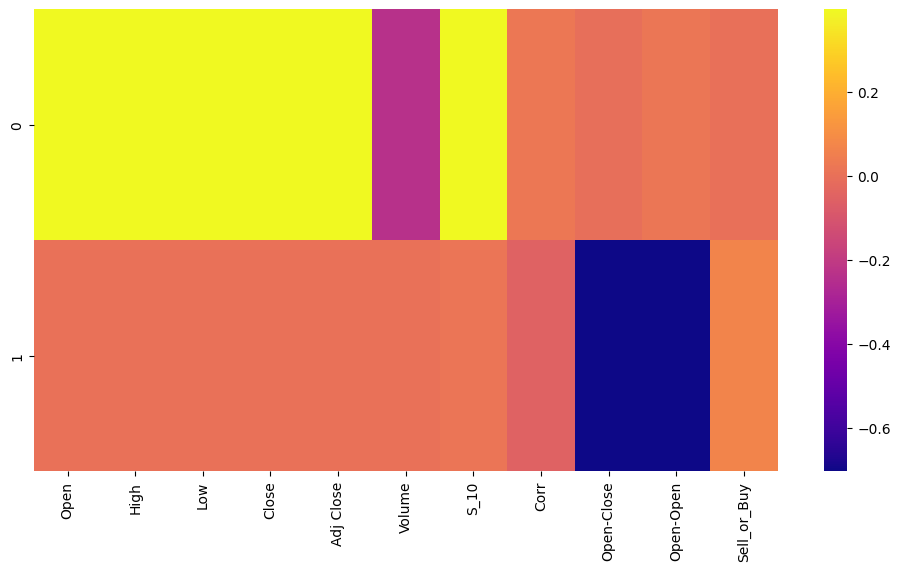

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)